# Trabalho 2

**Pesquise e apresente um trabalho sobre aplicações da técnica Random Forest**

* Dataset utilizado: https://www.kaggle.com/datasets/camnugent/california-housing-prices

* Referências: 
    * https://medium.com/@alexrubino05/house-price-prediction-in-python-using-random-forest-59dc51bf7498;
    * https://colab.research.google.com/drive/1IINu1ZO3vm6J4dikuSnoEQYId90sPP0F?usp=sharing#scrollTo=VPHwPCVLYH08

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Convertendo valores categóricos em colunas dummy
data = pd.get_dummies(data, columns=['ocean_proximity'])
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [6]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [7]:
# Converter as colunas específicas de booleano para inteiro
data = data.astype({col: 'int' for col in data.columns if data[col].dtype == 'bool'})

In [8]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [9]:
X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Remover linhas com NaN em X_train e y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Atualizar y_train para corresponder aos índices de X_train

X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Atualizar y_test para corresponder aos índices de X_test

## Comparando Modelos

### Regressão Linear

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = lm.predict(X_train)

- **MAE (Mean Absolute Error)**: Mede o erro médio absoluto entre os valores reais e previstos.Calcula a média das diferenças absolutas, sem considerar a direção do erro (se é positivo ou negativo).
  
  $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}| $$

- **MSE (Mean Squared Error)**: Mede a média dos erros ao quadrado entre os valores reais e previstos, penalizando erros grandes mais severamente do que o MAE.
  
  $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$

- **RMSE (Root Mean Squared Error)**: A raiz quadrada do MSE, que traz os erros de volta à mesma unidade dos dados.
  
  $$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2} $$

- **R² (Coeficiente de Determinação)**: Mede a proporção da variação explicada pelo modelo.

  $$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$


In [15]:
#Avaliação do Modelo
from sklearn import metrics
import numpy as np
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:', 1- (1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))


R^2: 0.6457680297910646
Adjusted R^2: 0.6454861705908739
MAE: 49712.804565661856
MSE: 4723287154.495827
RMSE: 68726.17517726289


In [16]:
lm.score(X_test, y_test)

0.6486139141392955

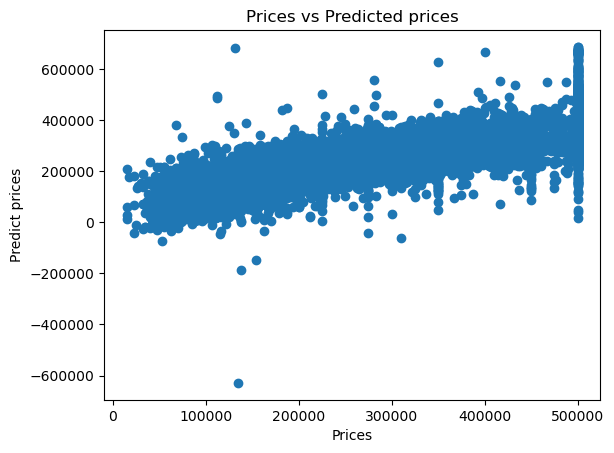

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predict prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [18]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [19]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6486139141392955
Adjusted R^2: 0.6474907228149314
MAE: 50087.99758055918
MSE: 4667965632.670901
RMSE: 68322.51190252669


## Random Forest

In [20]:

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=10,random_state=100)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=100)

In [21]:
y_pred = forest.predict(X_train)

In [22]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9641183715608849
Adjusted R^2: 0.9640898208710998
MAE: 13434.39886863992
MSE: 478441385.7080754
RMSE: 21873.30303607746


In [23]:
forest.score(X_test, y_test)

0.8075929413929005

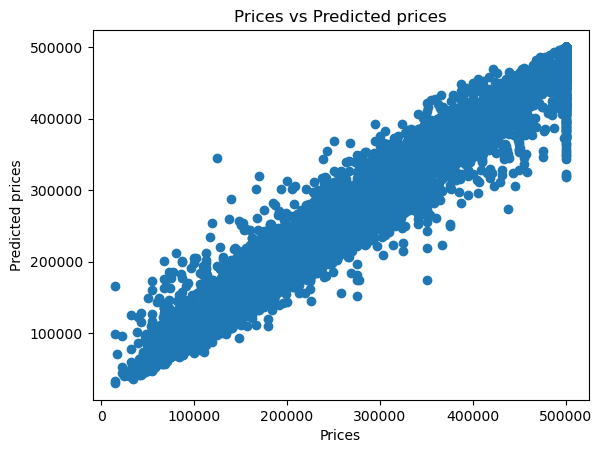

In [24]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [25]:
# Predicting Test data with the model
y_test_pred = forest.predict(X_test)

In [26]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8075929413929005
Adjusted R^2: 0.8069779200597575
MAE: 33079.21852487136
MSE: 2556019071.9028034
RMSE: 50557.08725690992


In [27]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R-squared Score': [acc_linreg*100, acc_rf*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,80.759294
0,Linear Regression,64.861391
